<a href="https://colab.research.google.com/github/nirmalpate/Hello_Fresh_Regression_Analysis/blob/main/Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
channel = pd.read_csv('/content/dim_marketing_channel.csv',sep = ';')

In [ ]:
campaign = pd.read_csv('/content/dim_campaign.csv',sep = ';')

In [7]:
performance = pd.read_csv('/content/fact_marketing_performance.csv',sep = ';')

In [8]:
performance['date'] = pd.to_datetime(performance['date'])

/tmp/ipython-input-850004730.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  performance['date'] = pd.to_datetime(performance['date'])


In [9]:
performance.describe()

,performance_id,date,channel_key,campaign_key,spend,impressions,clicks,conversions,revenue,ctr,cpc,cpa,roas
count,1003.000000,1003,1003.000000,355.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,502.000000,2025-09-15 14:47:15.493519360,4.492522,5.783099,4071.920399,78589.372881,2127.716849,183.801595,14861.601944,24.025788,4.605713,79.846441,6.445344
min,1.000000,2025-06-19 00:00:00,1.000000,1.000000,212.310000,5022.000000,33.000000,2.000000,158.630000,0.519200,0.060000,0.580000,0.030000
25%,251.500000,2025-08-03 00:00:00,2.000000,3.000000,2155.440000,40352.500000,809.500000,52.000000,4028.630000,12.261500,1.005000,11.380000,1.040000
50%,502.000000,2025-09-13 00:00:00,4.000000,6.000000,4046.040000,78442.000000,1665.000000,126.000000,9565.450000,24.625000,2.040000,27.630000,2.760000
75%,752.500000,2025-10-30 00:00:00,7.000000,8.000000,5924.530000,114621.000000,3192.500000,258.000000,21259.165000,36.431000,4.875000,70.580000,6.945000
max,1003.000000,2025-12-15 00:00:00,8.000000,10.000000,7987.560000,149989.000000,7101.000000,1012.000000,103408.950000,49.968000,177.510000,3788.600000,156.600000
std,289.685462,NaN,2.358721,2.869230,2244.822668,42527.641409,1622.458193,174.638976,15219.356510,15.241357,9.776735,217.892930,12.125065


In [10]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   performance_id  1003 non-null   int64         
 1   date            1003 non-null   datetime64[ns]
 2   channel_key     1003 non-null   int64         
 3   campaign_key    355 non-null    float64       
 4   country_code    1003 non-null   object        
 5   spend           1003 non-null   float64       
 6   impressions     1003 non-null   int64         
 7   clicks          1003 non-null   int64         
 8   conversions     1003 non-null   int64         
 9   revenue         1003 non-null   float64       
 10  ctr             1003 non-null   float64       
 11  cpc             1003 non-null   float64       
 12  cpa             1003 non-null   float64       
 13  roas            1003 non-null   float64       
 14  created_at      1003 non-null   object        
dtypes: d

In [11]:
merged_df = pd.merge(performance, channel[['channel_name','channel_type', 'channel_key']], on = 'channel_key', how = 'left')

In [12]:
merged_df.dropna(subset=['revenue'], inplace=True)

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   performance_id  1003 non-null   int64         
 1   date            1003 non-null   datetime64[ns]
 2   channel_key     1003 non-null   int64         
 3   campaign_key    355 non-null    float64       
 4   country_code    1003 non-null   object        
 5   spend           1003 non-null   float64       
 6   impressions     1003 non-null   int64         
 7   clicks          1003 non-null   int64         
 8   conversions     1003 non-null   int64         
 9   revenue         1003 non-null   float64       
 10  ctr             1003 non-null   float64       
 11  cpc             1003 non-null   float64       
 12  cpa             1003 non-null   float64       
 13  roas            1003 non-null   float64       
 14  created_at      1003 non-null   object        
 15  chan

In [14]:
merged_df['Month'] = merged_df['date'].dt.month

In [15]:
monthly_revenue = merged_df.groupby('Month')['revenue'].sum()

In [16]:
monthly_revenue

,revenue
Month,
6,782135.85
7,2418922.32
8,2836590.59
9,2372470.45
10,2839640.44
11,2481914.52
12,1174512.58


In [18]:
merged_df
channel_stats = merged_df.groupby('channel_name')['impressions', 'clicks', 'revenue'].sum()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [19]:
merged_df

,performance_id,date,channel_key,campaign_key,country_code,spend,impressions,clicks,conversions,revenue,ctr,cpc,cpa,roas,created_at,channel_name,channel_type,Month
0,1,2025-12-15,2,7.0,US,4243.83,147237,3797,102,9160.69,25.788,1.12,41.61,2.16,2025-12-15 15:19:39.358573,Meta Ads,Social,12
1,2,2025-12-15,8,NaN,UK,3617.31,75007,2228,313,30004.18,29.704,1.62,11.56,8.29,2025-12-15 15:19:39.358611,Referral,Referral,12
2,3,2025-12-15,2,1.0,AU,306.66,67730,2501,151,10968.53,36.926,0.12,2.03,35.77,2025-12-15 15:19:39.358633,Meta Ads,Social,12
3,4,2025-12-15,4,NaN,US,4169.20,45362,1244,140,8662.36,27.424,3.35,29.78,2.08,2025-12-15 15:19:39.358686,Display Network,Display,12
4,5,2025-12-15,8,NaN,CA,4875.15,149510,1720,77,7677.16,11.504,2.83,63.31,1.57,2025-12-15 15:19:39.358720,Referral,Referral,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,2025-06-19,7,8.0,US,814.27,81053,993,107,9638.16,12.251,0.82,7.61,11.84,2025-12-15 15:19:39.379288,Direct Traffic,Direct,6
999,1000,2025-06-19,4,4.0,UK,7939.78,47217,2346,199,17651.12,49.685,3.38,39.90,2.22,2025-12-15 15:19:39.379304,Display Network,Display,6
1000,1001,2025-06-19,6,NaN,DE,3561.03,81242,1723,226,25143.49,21.208,2.07,15.76,7.06,2025-12-15 15:19:39.379320,Organic Search,Search,6
1001,1002,2025-06-19,7,NaN,AU,7956.36,24660,1186,111,5304.97,48.094,6.71,71.68,0.67,2025-12-15 15:19:39.379336,Direct Traffic,Direct,6


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
merged_df['DayOfWeek'] = merged_df['date'].dt.dayofweek

In [22]:
merged_df

,performance_id,date,channel_key,campaign_key,country_code,spend,impressions,clicks,conversions,revenue,ctr,cpc,cpa,roas,created_at,channel_name,channel_type,Month,DayOfWeek
0,1,2025-12-15,2,7.0,US,4243.83,147237,3797,102,9160.69,25.788,1.12,41.61,2.16,2025-12-15 15:19:39.358573,Meta Ads,Social,12,0
1,2,2025-12-15,8,NaN,UK,3617.31,75007,2228,313,30004.18,29.704,1.62,11.56,8.29,2025-12-15 15:19:39.358611,Referral,Referral,12,0
2,3,2025-12-15,2,1.0,AU,306.66,67730,2501,151,10968.53,36.926,0.12,2.03,35.77,2025-12-15 15:19:39.358633,Meta Ads,Social,12,0
3,4,2025-12-15,4,NaN,US,4169.20,45362,1244,140,8662.36,27.424,3.35,29.78,2.08,2025-12-15 15:19:39.358686,Display Network,Display,12,0
4,5,2025-12-15,8,NaN,CA,4875.15,149510,1720,77,7677.16,11.504,2.83,63.31,1.57,2025-12-15 15:19:39.358720,Referral,Referral,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,2025-06-19,7,8.0,US,814.27,81053,993,107,9638.16,12.251,0.82,7.61,11.84,2025-12-15 15:19:39.379288,Direct Traffic,Direct,6,3
999,1000,2025-06-19,4,4.0,UK,7939.78,47217,2346,199,17651.12,49.685,3.38,39.90,2.22,2025-12-15 15:19:39.379304,Display Network,Display,6,3
1000,1001,2025-06-19,6,NaN,DE,3561.03,81242,1723,226,25143.49,21.208,2.07,15.76,7.06,2025-12-15 15:19:39.379320,Organic Search,Search,6,3
1001,1002,2025-06-19,7,NaN,AU,7956.36,24660,1186,111,5304.97,48.094,6.71,71.68,0.67,2025-12-15 15:19:39.379336,Direct Traffic,Direct,6,3


In [23]:
df_ml = pd.get_dummies(merged_df, columns=['channel_name', 'country_code'], drop_first=True)

In [25]:
features = [col for col in df_ml.columns if 'channel_name_' in col or 'country_code_' in col]

In [35]:
features = [col for col in df_ml.columns if 'channel_name_' in col or 'country_code_' in col]
features.extend(['impressions', 'clicks', 'DayOfWeek', 'Month'])

In [37]:
X = df_ml[features]
y = df_ml['revenue']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [41]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"--- Model Performance ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

--- Model Performance ---
R-squared (R²): 0.5757
Mean Absolute Error (MAE): $6687.75
Root Mean Squared Error (RMSE): $9596.80


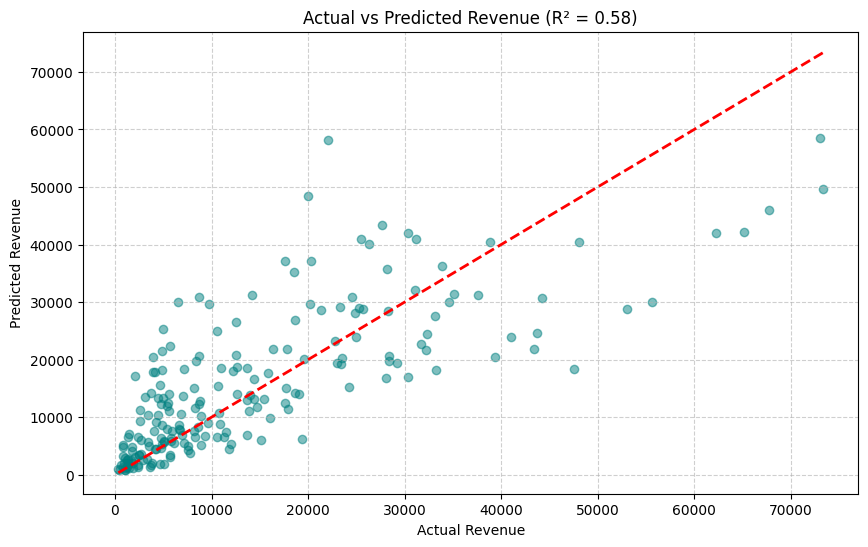

/tmp/ipython-input-223832260.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette='viridis')


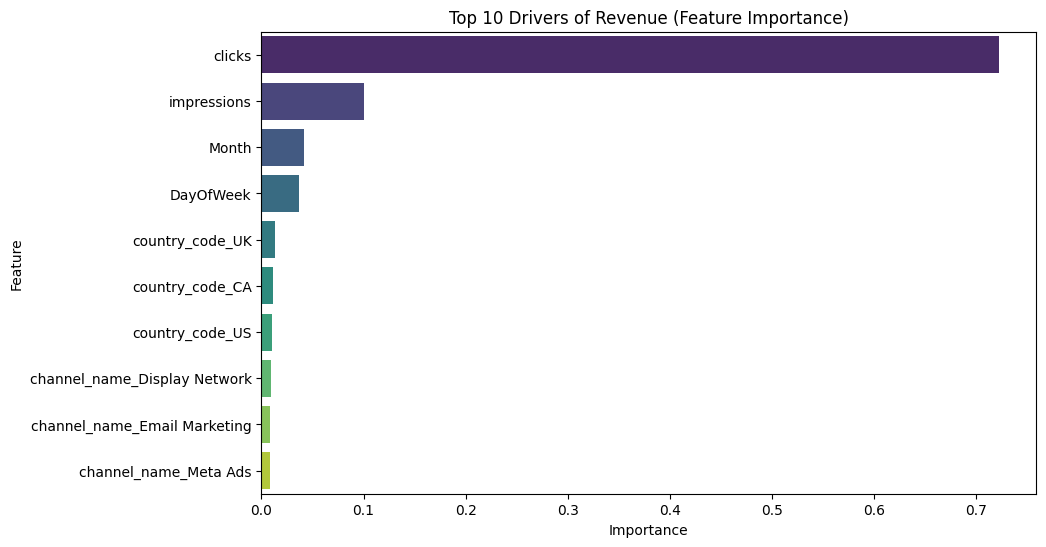

In [42]:
# --- 6. VISUALIZATION ---
# Plot 1: Actual vs Predicted Revenue
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Actual vs Predicted Revenue (R² = {r2:.2f})')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot 2: Top Drivers of Revenue
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10), palette='viridis')
plt.title('Top 10 Drivers of Revenue (Feature Importance)')
plt.show()